<a href="https://colab.research.google.com/github/PravallikaaMohan/SPARK-Foundation-GRIP-/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION GRADUATE ROTATIONAL INTERNSHIP PROGRAM(GRIP)**

## **TASK 1:OBJECT DETECTION USING OPENCV**

Implementing an object detector that identifies the classes of objects in an image.



**Author:**Pravallikaa M

**Dataset:**https://cocodataset.org/#home











In [ ]:
!pip install --upgrade opencv-python

### **IMPORTING THE LIBRARY**

In [ ]:
import cv2
import matplotlib.pyplot as plt

### **LOADING THE NECESSARY FILES AND DATASET**

In [ ]:
from google.colab import files
files.upload()
print('Uploaded the configuration file')
files.upload()
print('Uploaded the frozen model')
files.upload() 
print('Uploaded the labels of COCO dataset')

Saving ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt to ssd_mobilenet_v3_large_coco_2020_01_14 (1).pbtxt
Uploaded the configuration file


Uploaded the frozen model


Saving coco_names.txt to coco_names.txt
Uploaded the labels of COCO dataset


In [ ]:
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weights = 'frozen_inference_graph.pb'

### **LOADING THE IMAGE**

In [ ]:
files.upload()
image = cv2.imread("busyStreet.jpg")

In [ ]:
image.shape

(194, 259, 3)

In [ ]:
classNames = [] #Create an empty list to store the class names obtained from the dataset
with open('coco_names.txt','rt') as f: # Loop through the Files with classnames in it and store the class names in the list created above
  classNames = f.read().rstrip('\n').split('\n')

### **BUILDING THE MODEL**

In [ ]:
model = cv2.dnn_DetectionModel(weights, configPath)

In [ ]:
model.setInputSize(320,320) # Set input size for frame. If the shape of new blob is less than zero, the frame size does not change.

<dnn_Model 0x7f37e0f13430>

In [ ]:
model.setInputScale(1.0/ 127.5) 

<dnn_Model 0x7f37e0f13570>

In [ ]:
model.setInputMean((127.5, 127.5, 127.5)) # Set mean value for frame

<dnn_Model 0x7f37e0f13790>

In [ ]:
''' OpenCV assumes that the images are in BGR channel order but the mean assumes them  to be in RGB channel order. 
So we need to swap the R and B channels in the image '''

In [ ]:
model.setInputSwapRB(True) 

<dnn_Model 0x7f37e0f13ab0>

### **EVALUATING THE MODEL**

In [ ]:
classIds, confs, box = model.detect(image,confThreshold=0.5)

In [ ]:
print(classIds,box,confs)

[1 1 1 1] [[456 114 308 389]
 [207  51 119 196]
 [342  41 118 227]
 [  8  64  97 165]] [0.6173439  0.54286003 0.5259898  0.5226926 ]


In [ ]:
for classId, conf, bbox in zip(classIds.flatten(),confs.flatten(),box):
  cv2.rectangle(image,bbox,color = (0, 255, 0),thickness=2)
  cv2.putText(image,classNames[classId-1].upper(),(bbox[0]+10,bbox[1]+30),
          cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
  cv2.putText(image, str(conf), (bbox[0] + 150, bbox[1] + 30),
          cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

In [ ]:
from google.colab.patches import cv2_imshow

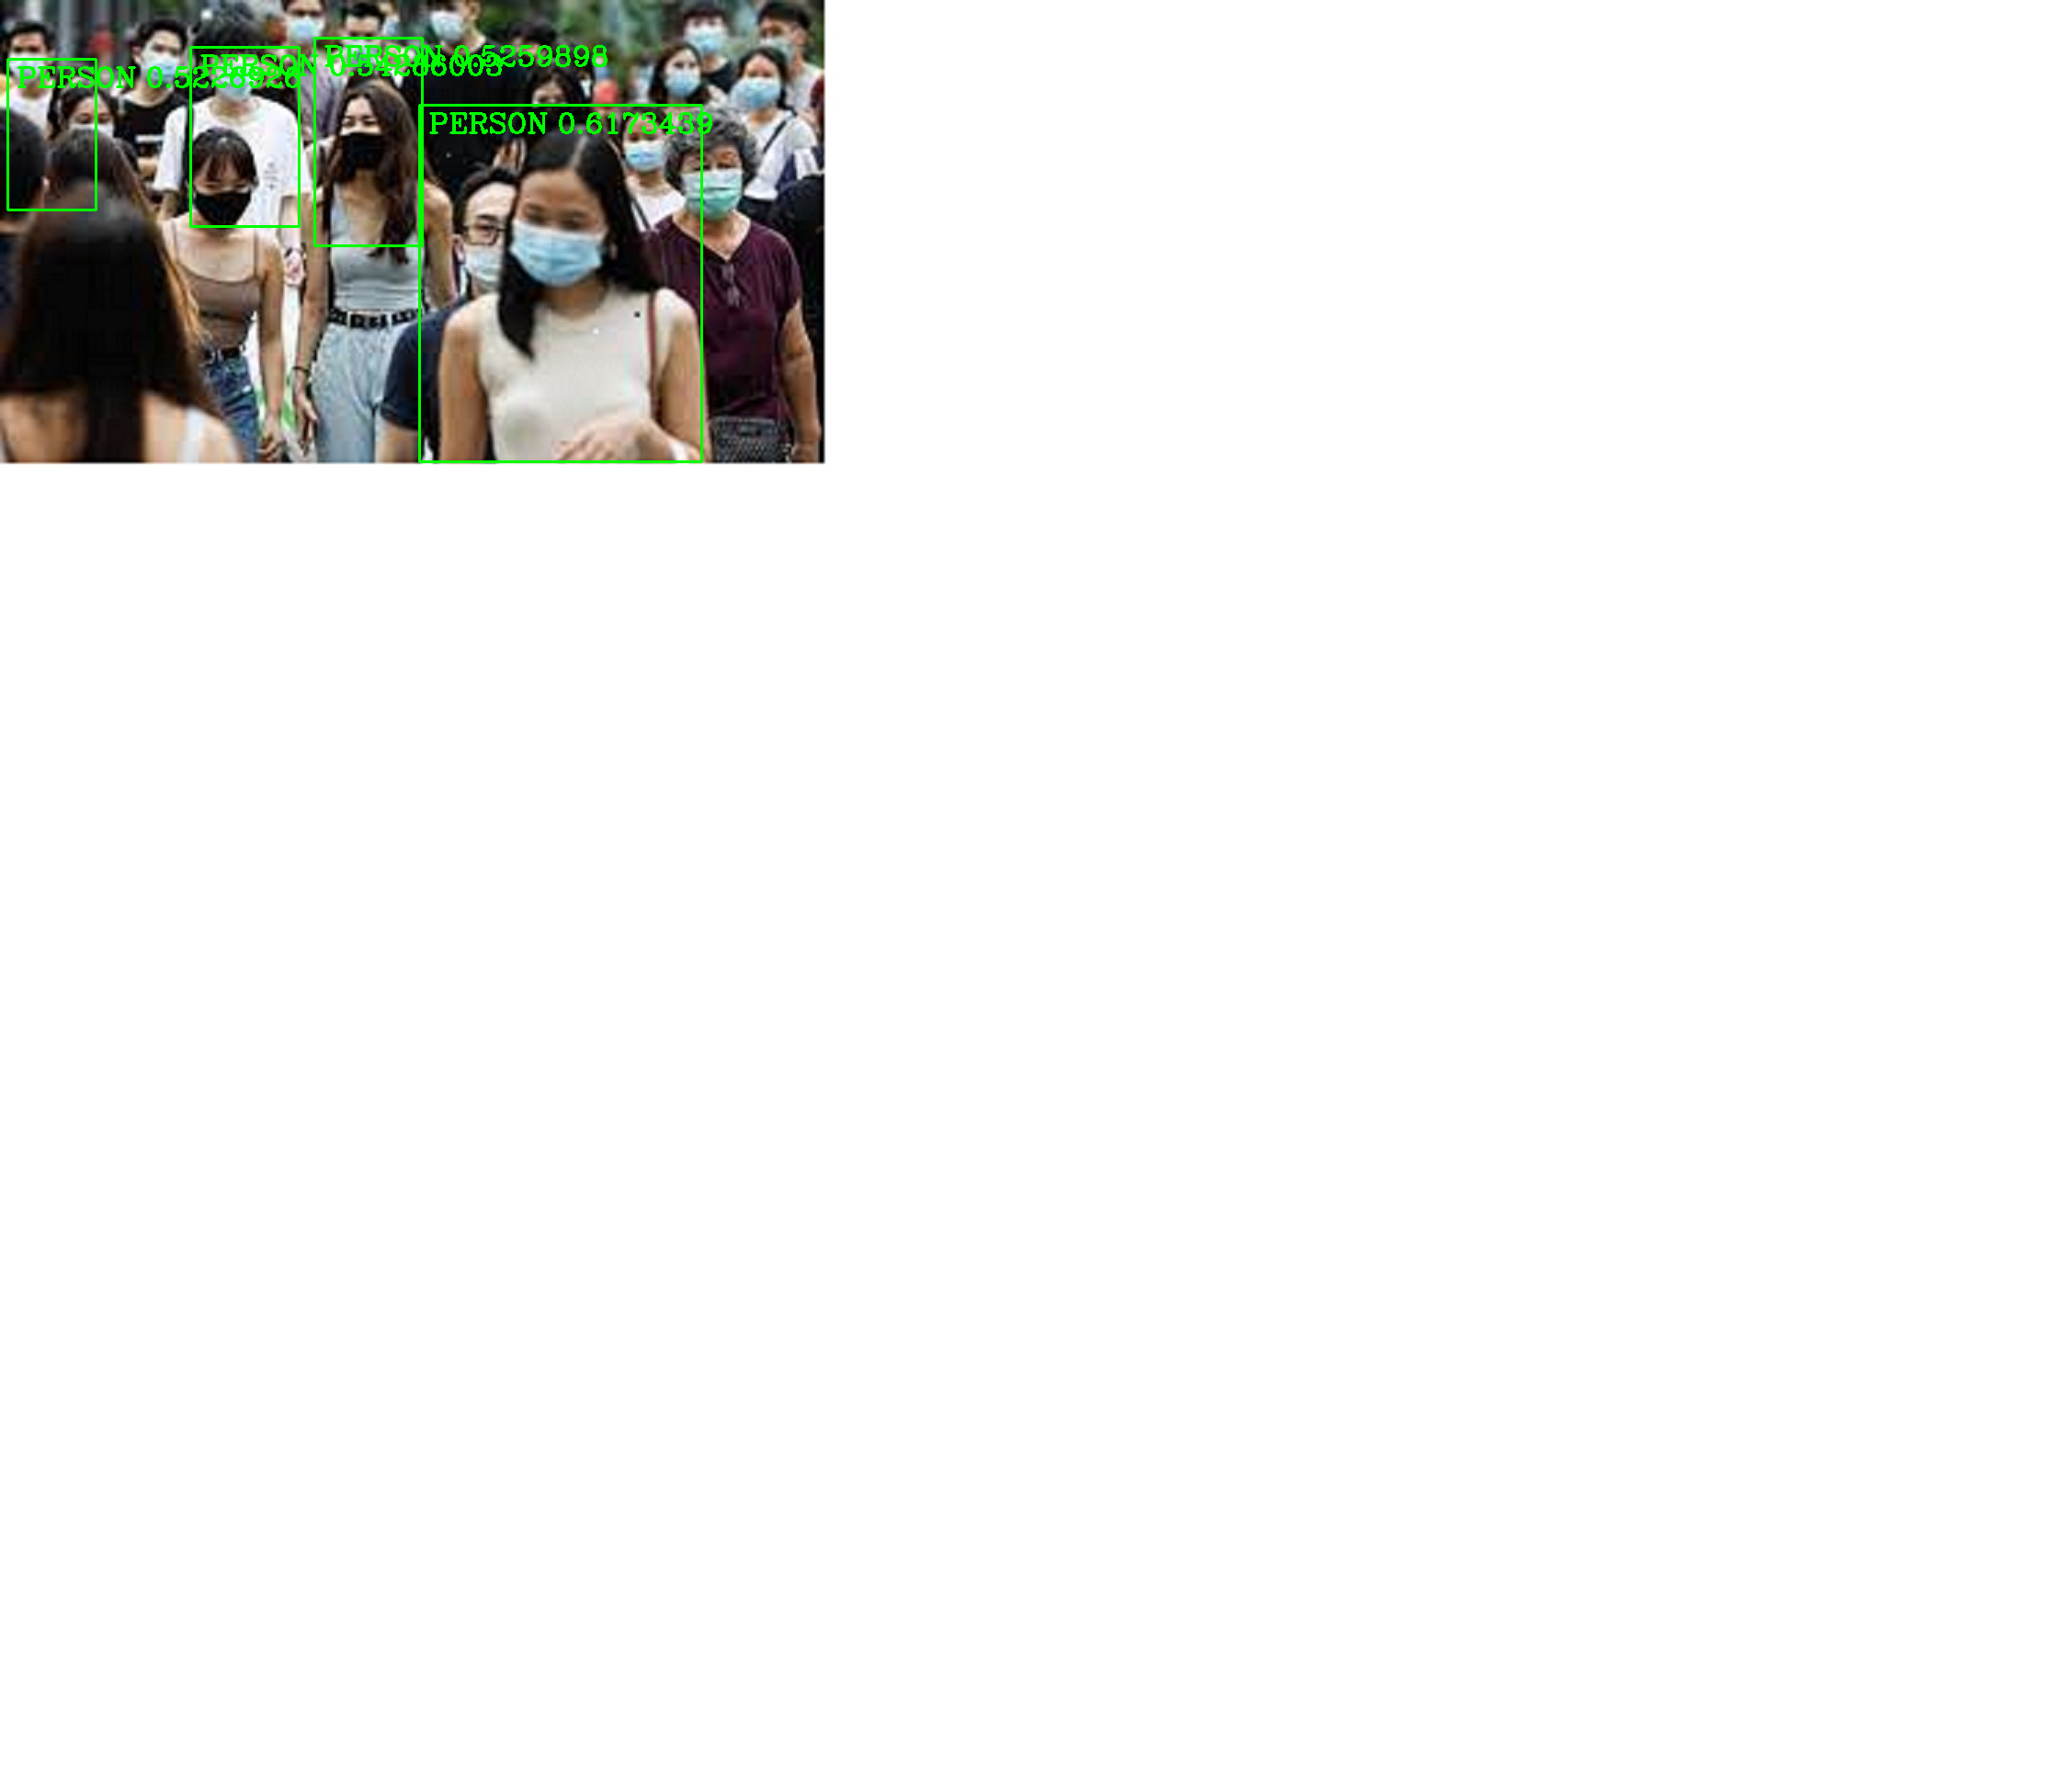

-1

In [ ]:
cv2_imshow(image)
cv2.waitKey(1)